# Analysis

Trends Observed:
* Capomuling is the most promising drug. The tumor volume decreased with time while taking this drug.
* The metastatic sited increased while the mice were taking Capomuling but at the lowest rate among all drugs tested
* The survival rate of Capomulin after 45 days of triasl is 2x better than all the other drugs tested which had survival rates similar to the placebo

Import dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import seaborn as sns
sns.set()

Load CSV data into pandas DataFrames

In [2]:
drugs_df = pd.read_csv(os.path.join('Resources', 'mouse_drug_data.csv'))
trials_df = pd.read_csv(os.path.join('Resources', 'clinicaltrial_data.csv'))
trials_df = trials_df.merge(drugs_df, how='left', on='Mouse ID')
trials_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
drug_response_df = trials_df.pivot_table(values='Tumor Volume (mm3)', index=['Drug','Timepoint'])
drug_response_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [4]:
#get mean per drug-timepoint pair
drug_response_mean_df = trials_df.pivot_table(values='Tumor Volume (mm3)', index=['Timepoint'], columns='Drug')
#get standard error of mean per drug-timepoint pair
drug_response_sem_df = trials_df.pivot_table(values='Tumor Volume (mm3)', index=['Timepoint'], columns='Drug',
                                             aggfunc=scipy.stats.sem)
drug_response_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


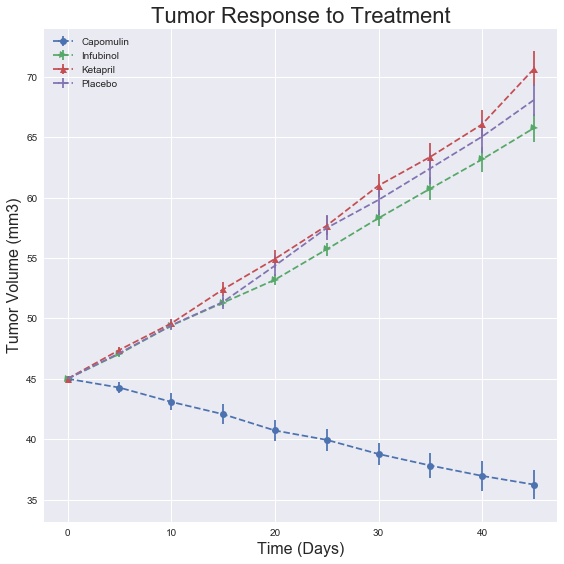

In [5]:
#analyze response to treatment of Capomulin, Infubinol, Ketapril, and Placebo
include_in_analysis = ['Capomulin', 'Infubinol', 'Ketapril',  'Placebo']
fig, ax = plt.subplots(figsize=(8,8))
xaxis = drug_response_sem_df.index
marker_formats = ['--o', '--<', '-->', '--^', '--+', '--x', '--d', '--s', '--p', '--h' ]
ax.set_title('Tumor Response to Treatment', fontsize=22)
ax.set_xlabel('Time (Days)' , fontsize=16)
ax.set_ylabel('Tumor Volume (mm3)', fontsize=16)
for mrkformat,drug in zip(marker_formats,drug_response_mean_df.columns):
    if drug not in include_in_analysis:
        continue
    ax.errorbar(xaxis, drug_response_mean_df[drug], xerr=0.0, yerr = drug_response_sem_df[drug],\
                fmt=mrkformat, label=drug)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Metastatic Response to Treatment

In [6]:
#get mean per drug-timepoint pair
drug_sites_mean_df = trials_df.pivot_table(values='Metastatic Sites', index=['Timepoint'], columns='Drug')
#get standard error of mean per drug-timepoint pair
drug_sites_sem_df = trials_df.pivot_table(values='Metastatic Sites', index=['Timepoint'], columns='Drug', 
                                          aggfunc=scipy.stats.sem)
drug_sites_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


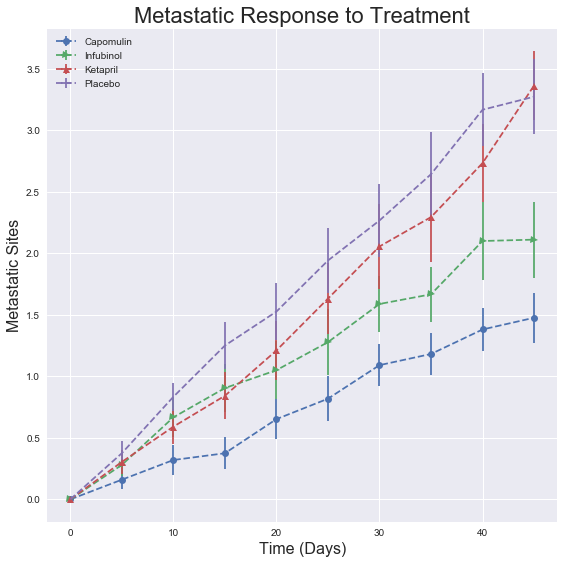

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Metastatic Response to Treatment', fontsize=22)
ax.set_xlabel('Time (Days)' , fontsize=16)
ax.set_ylabel('Metastatic Sites', fontsize=16)
for mrkformat,drug in zip(marker_formats,drug_sites_mean_df.columns):
    if drug not in include_in_analysis:
        continue
    ax.errorbar(xaxis, drug_sites_mean_df[drug], xerr=0.0, yerr = drug_sites_sem_df[drug],\
                fmt=mrkformat, label=drug)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Survival Rates

In [8]:
#get count per drug-timepoint pair
survive_count_df = trials_df.pivot_table(values='Mouse ID', index=['Timepoint'], columns='Drug',aggfunc=np.count_nonzero)
survive_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [9]:
#get percentage per drug-timepoint pair (initial value in time is 100%)
survive_count_df = 100*survive_count_df/25
#Propriva and Stelasyn have max of 26 not 25
survive_count_df[['Propriva','Stelasyn']] = survive_count_df[['Propriva','Stelasyn']]*25/26
survive_count_df = survive_count_df.applymap( lambda x: round(x,2))
survive_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0


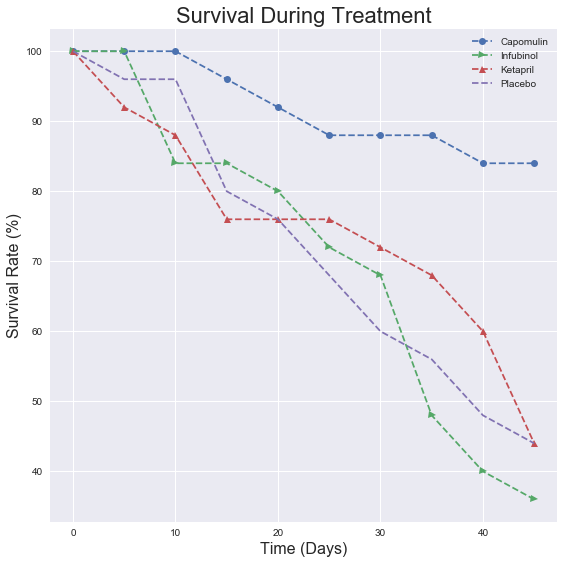

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Survival During Treatment', fontsize=22)
ax.set_xlabel('Time (Days)' , fontsize=16)
ax.set_ylabel('Survival Rate (%)', fontsize=16)
for mrkformat,drug in zip(marker_formats,survive_count_df.columns):
    if drug not in include_in_analysis:
        continue
    ax.plot(xaxis, survive_count_df[drug],mrkformat, label=drug)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Summary Bar Graph

In [11]:
#get volume %change
vol_percent_change = (100*(drug_response_mean_df.iloc[-1,:] - drug_response_mean_df.iloc[0,:])/drug_response_mean_df.iloc[0,:])
vol_percent_change = vol_percent_change.loc[include_in_analysis]
vol_percent_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

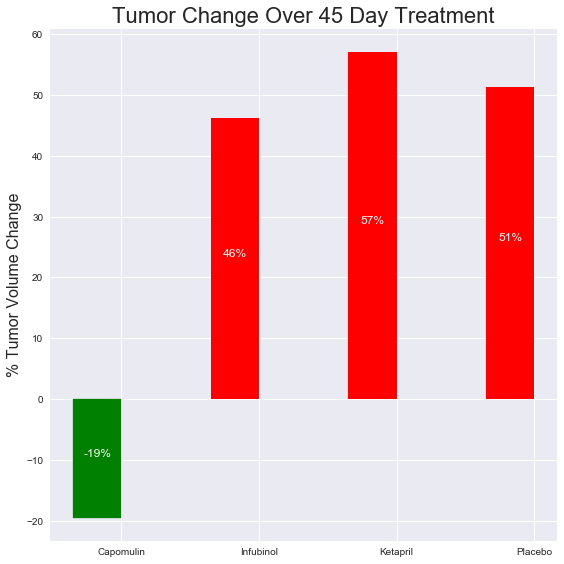

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
#set number of items to plot
ind = np.arange(len(include_in_analysis)) 
#set widht of bars to plot
width = 0.35 
ax.set_title('Tumor Change Over 45 Day Treatment', fontsize=22)
ax.set_xticklabels(include_in_analysis)
ax.set_ylabel('% Tumor Volume Change', fontsize=16)
ax.set_xticks(ind + width / 2)
#plot bars
bars = ax.bar(ind, vol_percent_change.values, width, color='r')
#change color of Capomulin since volume ot tumor decreased
bars[0].set_color('g')
plt.legend(loc='best')
plt.tight_layout()

for bar in bars:
        #write labels at half height of bars
        label_position = .5*bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.,
                label_position, f'{int(bar.get_height())}%',
                ha='center', va='bottom', color='w')

plt.show()